<h1 style = 'color : red'> STUDENT PERFORMANCE PREDICT </h1>

## import libraries

In [207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [73]:
# read the input file
df = pd.read_csv("/Users/trantuan/Documents/Machine Learning/Student_Performance.csv")
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [157]:
x_cols = ['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced']
y_cols = ['Performace Index']
df_encoded = pd.get_dummies(df, columns=['Extracurricular Activities'], drop_first=True)
X = df_encoded.drop(columns=['Performance Index'])
y = df_encoded['Performance Index']
X = X.to_numpy()
y = y.to_numpy()
print(f"X.shape = {X.shape}, y.shape = {y.shape}")

X.shape = (10000, 5), y.shape = (10000,)


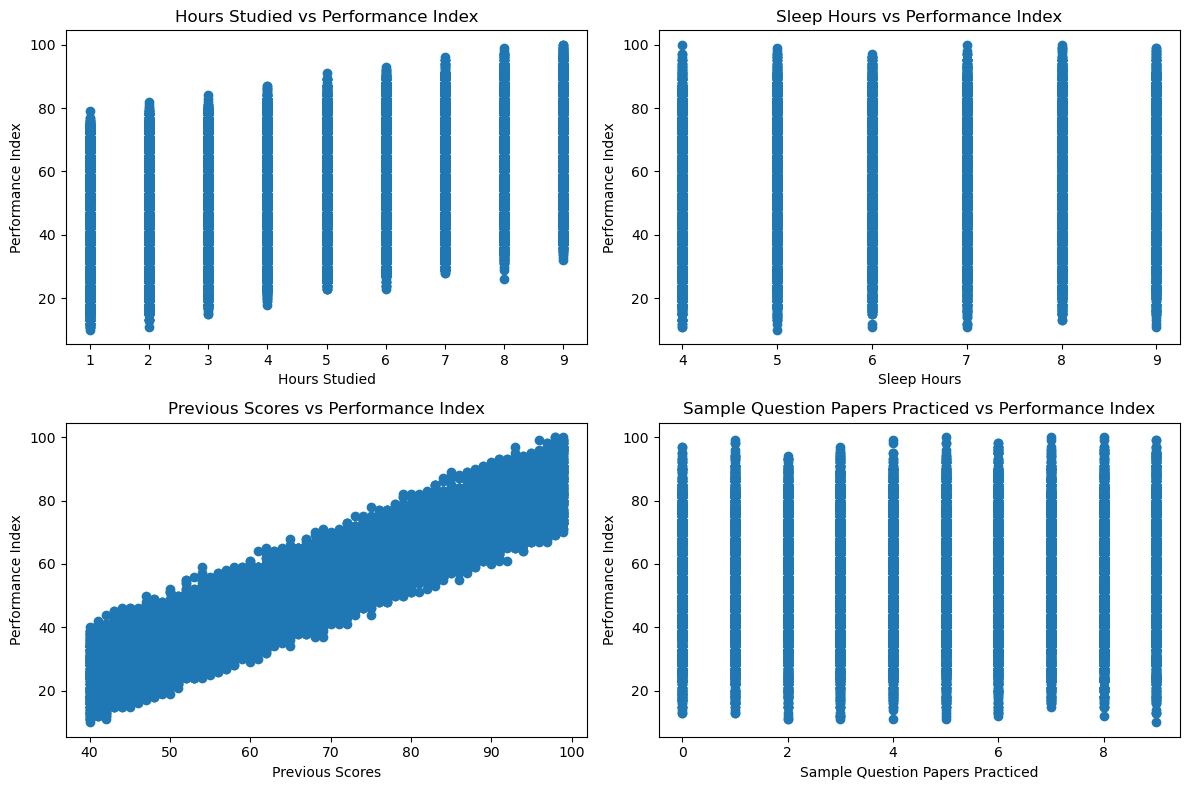

In [159]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
# Biểu đồ đầu tiên
axs[0, 0].scatter(df_encoded['Hours Studied'], df_encoded['Performance Index'])
axs[0, 0].set_xlabel('Hours Studied')  
axs[0, 0].set_ylabel('Performance Index') 
axs[0, 0].set_title('Hours Studied vs Performance Index')

# Biểu đồ thứ hai
axs[0, 1].scatter(df_encoded['Sleep Hours'], df_encoded['Performance Index'])
axs[0, 1].set_xlabel('Sleep Hours')
axs[0, 1].set_ylabel('Performance Index')
axs[0, 1].set_title('Sleep Hours vs Performance Index')

# Biểu đồ thứ ba
axs[1, 0].scatter(df_encoded['Previous Scores'], df_encoded['Performance Index'])
axs[1, 0].set_xlabel('Previous Scores')
axs[1, 0].set_ylabel('Performance Index')
axs[1, 0].set_title('Previous Scores vs Performance Index')

# Biểu đồ thứ tư
axs[1, 1].scatter(df_encoded['Sample Question Papers Practiced'], df_encoded['Performance Index'])
axs[1, 1].set_xlabel('Sample Question Papers Practiced')
axs[1, 1].set_ylabel('Performance Index')
axs[1, 1].set_title('Sample Question Papers Practiced vs Performance Index')

# Điều chỉnh không gian giữa các biểu đồ
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()


In [161]:
X_train, X_, y_train, y_ = train_test_split(X, y, test_size=0.4, random_state=42)
X_cv, X_test, y_cv, y_test = train_test_split(X_, y_, test_size=0.5, random_state=42)
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_cv shape: {X_cv.shape}, y_cv shape: {y_cv.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")
del X_, y_
print(type(X_train))

X_train shape: (6000, 5), y_train shape: (6000,)
X_cv shape: (2000, 5), y_cv shape: (2000,)
X_test shape: (2000, 5), y_test shape: (2000,)
<class 'numpy.ndarray'>


## Feature scaling

In [163]:
# Initialize the class
scaler_linear = StandardScaler()

# Compute the mean and standard deviation of the training set then transform it
X_train_scaled = scaler_linear.fit_transform(X_train)


print(f"Computed mean of the training set: {scaler_linear.mean_}")
print(f"Computed standard deviation of the training set: {scaler_linear.scale_}")


Computed mean of the training set: [ 4.97733333 69.6545      6.53516667  4.59933333  0.48583333]
Computed standard deviation of the training set: [ 2.60067034 17.31180127  1.6967901   2.87166611  0.49979927]


## Train the model

In [165]:
# Initialize the class
linear_model = LinearRegression()

# Train the model 
linear_model.fit(X_train_scaled, y_train )

LinearRegression()

## Evaluate the model
Using for loop and built-in function form sklearn library<br>
You can then compute the MSE for the cross validation set with basically the same equation:

$$J_{cv}(\vec{w}, b) = \frac{1}{2m_{cv}}\left[\sum_{i=1}^{m_{cv}}(f_{\vec{w},b}(\vec{x}_{cv}^{(i)}) - y_{cv}^{(i)})^2\right]$$

In [171]:
# Feed the scaled training set and get the predictions
yhat = linear_model.predict(X_train_scaled)
print(len(yhat))
# Use scikit-learn's utility function and divide by 2
print(f"training MSE (using sklearn function): {mean_squared_error(y_train, yhat) / 2}")

# for-loop implementation
total_squared_error = 0

for i in range(len(yhat)):
    squared_error_i  = (yhat[i] - y_train[i])**2
    total_squared_error += squared_error_i                                              

mse = total_squared_error / (2*len(yhat))

print(f"training MSE (for-loop implementation): {mse}")

6000
training MSE (using sklearn function): 2.063369521526815
training MSE (for-loop implementation): 2.063369521526813


## Create the addtional features
The code below demonstrates how to do this using the [`PolynomialFeatures`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) class. It will create a new input feature which has the squared values of the input `x` (i.e. degree=2).

In [187]:
# Initalize the clas
poly = PolynomialFeatures(degree = 2, include_bias=False)

#compute the number of features and transform the training set
X_train_mapped = poly.fit_transform(X_train)

print(X_train_mapped[:5])

[[6.000e+00 7.900e+01 5.000e+00 1.000e+00 0.000e+00 3.600e+01 4.740e+02
  3.000e+01 6.000e+00 0.000e+00 6.241e+03 3.950e+02 7.900e+01 0.000e+00
  2.500e+01 5.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00]
 [4.000e+00 7.500e+01 8.000e+00 6.000e+00 0.000e+00 1.600e+01 3.000e+02
  3.200e+01 2.400e+01 0.000e+00 5.625e+03 6.000e+02 4.500e+02 0.000e+00
  6.400e+01 4.800e+01 0.000e+00 3.600e+01 0.000e+00 0.000e+00]
 [3.000e+00 7.500e+01 8.000e+00 1.000e+00 0.000e+00 9.000e+00 2.250e+02
  2.400e+01 3.000e+00 0.000e+00 5.625e+03 6.000e+02 7.500e+01 0.000e+00
  6.400e+01 8.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00]
 [9.000e+00 8.000e+01 9.000e+00 9.000e+00 1.000e+00 8.100e+01 7.200e+02
  8.100e+01 8.100e+01 9.000e+00 6.400e+03 7.200e+02 7.200e+02 8.000e+01
  8.100e+01 8.100e+01 9.000e+00 8.100e+01 9.000e+00 1.000e+00]
 [1.000e+00 6.400e+01 6.000e+00 9.000e+00 0.000e+00 1.000e+00 6.400e+01
  6.000e+00 9.000e+00 0.000e+00 4.096e+03 3.840e+02 5.760e+02 0.000e+00
  3.600e+01 5.400e+01 0.000e

Train the model to see the **Training mse** and **Cross validation mse**

In [194]:
scaler_poly = StandardScaler()
X_train_mapped_scaled = scaler_poly.fit_transform(X_train_mapped)


# Initialize the class


model = LinearRegression()

# Train the model
model.fit(X_train_mapped_scaled, y_train )

# Compute the training MSE
yhat = model.predict(X_train_mapped_scaled)
print(f"Training MSE: {mean_squared_error(y_train, yhat) / 2}")

# Add the polynomial features to the cross validation set
X_cv_mapped = poly.transform(X_cv)

# Scale the cross validation set using the mean and standard deviation of the training set
X_cv_mapped_scaled = scaler_poly.transform(X_cv_mapped)

# Compute the cross validation MSE
yhat = model.predict(X_cv_mapped_scaled)
print(f"Cross validation MSE: {mean_squared_error(y_cv, yhat) / 2}")

Training MSE: 2.059413486043294
Cross validation MSE: 2.1158853415527346


You may want to introduce more polynomial terms and see which one gives the best performance. As shown in class, you can have 10 different models like this:

\begin{aligned}
f_{w,b}^{(1)} &= wx + b \\
f_{w,b}^{(2)} &= wx + wx^2 + b \\
.....\\
f_{w,b}^{(10)} &= wx + wx^2 + wx^3 ... + wx^{10} + b \\
\end{aligned}

You can create a loop that contains all the steps in the previous code cells. Here is one implementation that adds polynomial features up to degree=10. We'll plot it at the end to make it easier to compare the results for each model.

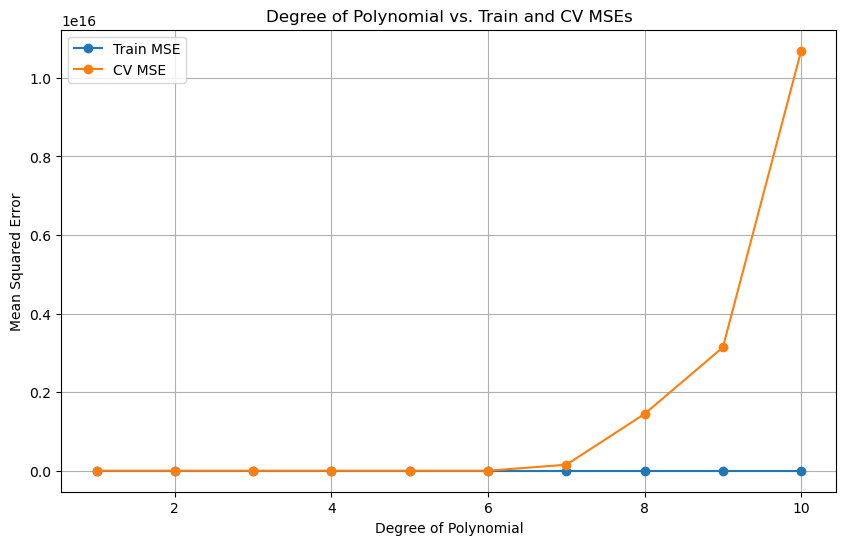

In [225]:
#Initialize list to save the error, models, and feature transform
train_mses = []
cv_mses = []
models = []
polys = []
scalers =[]
for degree in range(1, 11):
    #Add polynomial features to the training set
    poly = PolynomialFeatures(degree, include_bias = False)
    X_train_mapped = poly.fit_transform(X_train)
    polys.append(poly)

    # Scale the training set
    scaler_poly = StandardScaler()
    X_train_mapped_scaled = scaler_poly.fit_transform(X_train_mapped)
    scalers.append(scaler_poly)

    # create and train the model
    model = LinearRegression()
    model.fit(X_train_mapped_scaled, y_train)
    models.append(model)

    # compute the MSE
    yhat = model.predict(X_train_mapped_scaled)
    train_mse = mean_squared_error(y_train, yhat)/2
    train_mses.append(train_mse)

    # add polynomial feature and scale the cross validation set
    X_cv_mapped = poly.fit_transform(X_cv)
    X_cv_mapped_scaled = scaler_poly.fit_transform(X_cv_mapped)

    y_cv_pred = model.predict(X_cv_mapped_scaled)
    cv_mse = mean_squared_error(y_cv_pred, y_cv)/2
    cv_mses.append(cv_mse)

# Plot the results
degrees = range(1, 11)
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_mses, marker='o', label='Train MSE')
plt.plot(degrees, cv_mses, marker='o', label='CV MSE')

plt.title('Degree of Polynomial vs. Train and CV MSEs')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Mean Squared Error')

plt.legend()

# Hiển thị biểu đồ
plt.grid(True)
plt.show()

## find the degree that has the lowest cross validation MSE

In [231]:
degree = np.argmin(cv_mses) + 1
print(f"Lowest CV MSE is found in the model with degree={degree}")

Lowest CV MSE is found in the model with degree=1


## Evaluate the model using the test set


In [235]:

X_test_mapped = polys[degree-1].fit_transform(X_test)

# Scale the test set
X_test_mapped_scaled = scalers[degree-1].fit_transform(X_test_mapped)

# Compute the test MSE
yhat = models[degree-1].predict(X_test_mapped_scaled)
test_mse = mean_squared_error(y_test, yhat) / 2

print(f"Training MSE: {train_mses[degree-1]:.2f}")
print(f"Cross Validation MSE: {cv_mses[degree-1]:.2f}")
print(f"Test MSE: {test_mse:.2f}")

Training MSE: 2.06
Cross Validation MSE: 2.41
Test MSE: 2.12
